In [16]:
import numpy as np
import modin.pandas as mipd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import pyplot as plt

In [17]:
time_resolution = 6

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+str(time_resolution)+'/'

c_path = './network_data'+str(time_resolution)+'/commits/'
e_path = './network_data'+str(time_resolution)+'/emails/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("./tech_overlaps"+str(time_resolution)+".csv")
df_social_overlaps = pd.read_csv("./social_overlaps"+str(time_resolution)+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [18]:
%matplotlib inline

In [19]:
def remove_minus(list):
    while -1.0 in list :
        list.remove(-1.0)
    return list

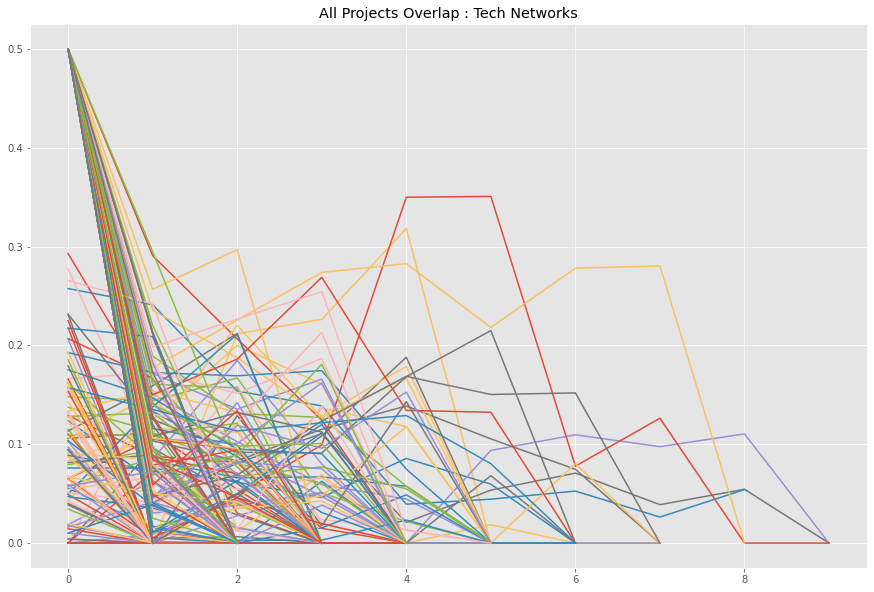

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_tech_overlaps.columns:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects Overlap : Tech Networks")
    

<BarContainer object of 10 artists>

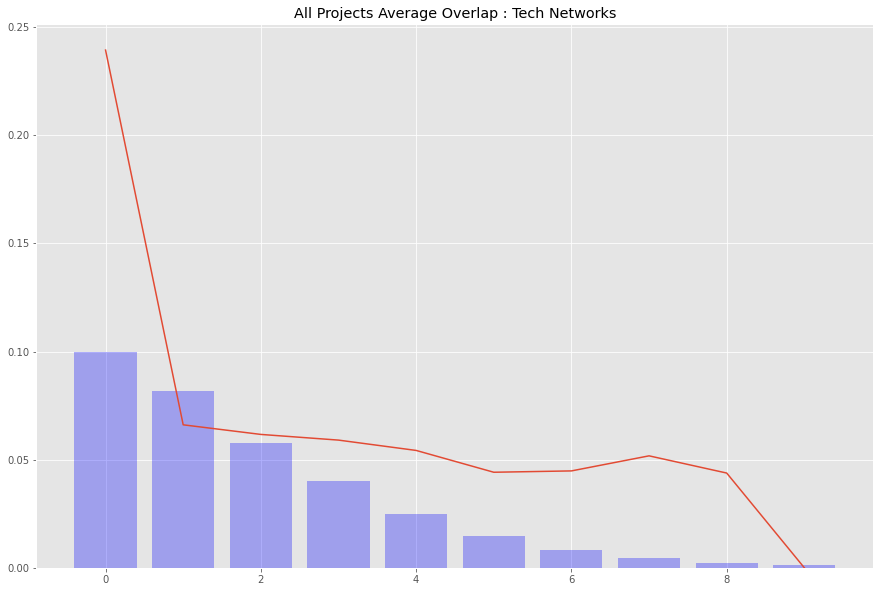

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.columns))]
count = [0 for i in range(len(df_tech_overlaps.columns))]

for col in df_tech_overlaps.columns:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("All Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
len(df_tech_overlaps.loc[0].values)
plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_overlaps.loc[0].values], label=[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7551400790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7553bc1430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f75514003d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7551410760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7551410af0>,
 'means': []}

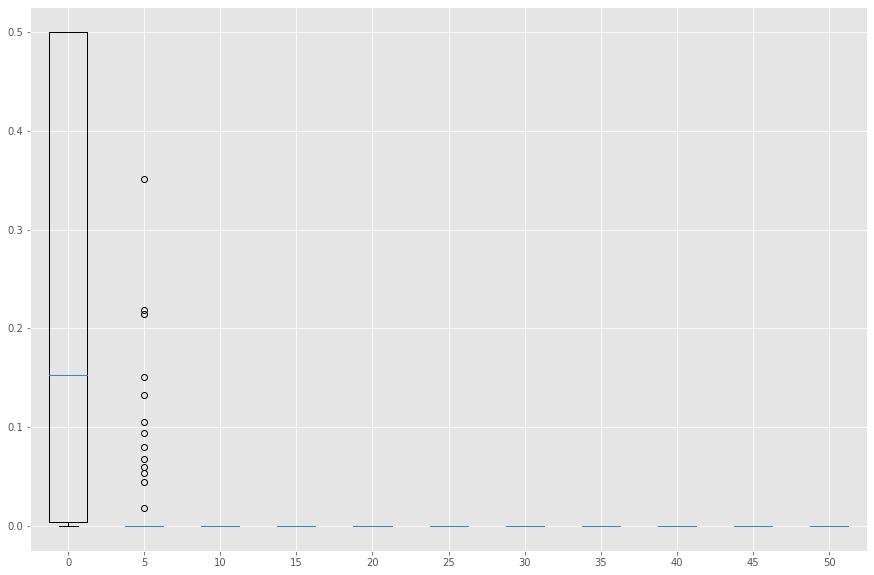

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_overlaps.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)

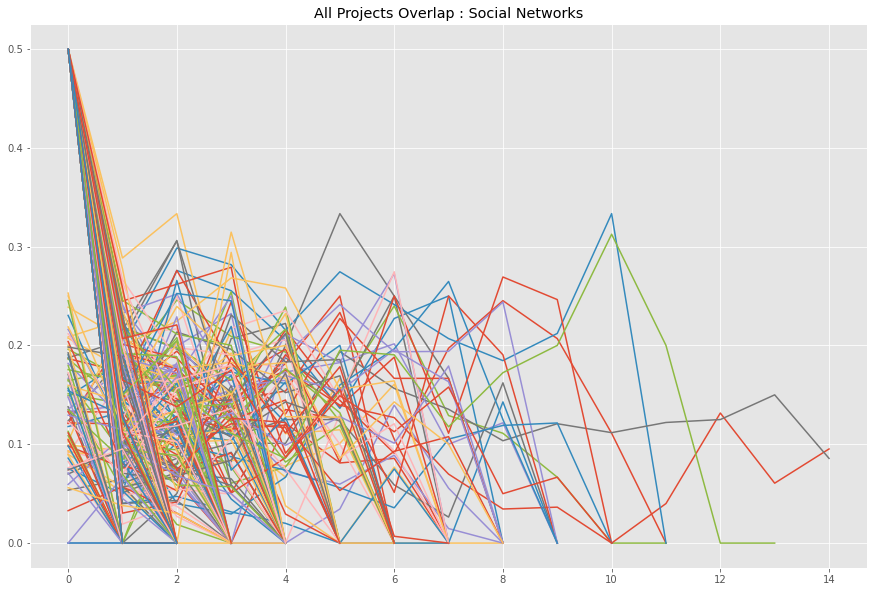

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_social_overlaps.columns:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects Overlap : Social Networks")

[0.3571694038664527, 0.11433951477481621, 0.10032959431525122, 0.09397197550912674, 0.09357293472770217, 0.10564864410837826, 0.10235710371606642, 0.08602527300618515, 0.09103455015536158, 0.08516166822109478, 0.09651958755776259, 0.06034120734908136, 0.08552631578947367, 0.0702020202020202, 0.09047619047619046, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2

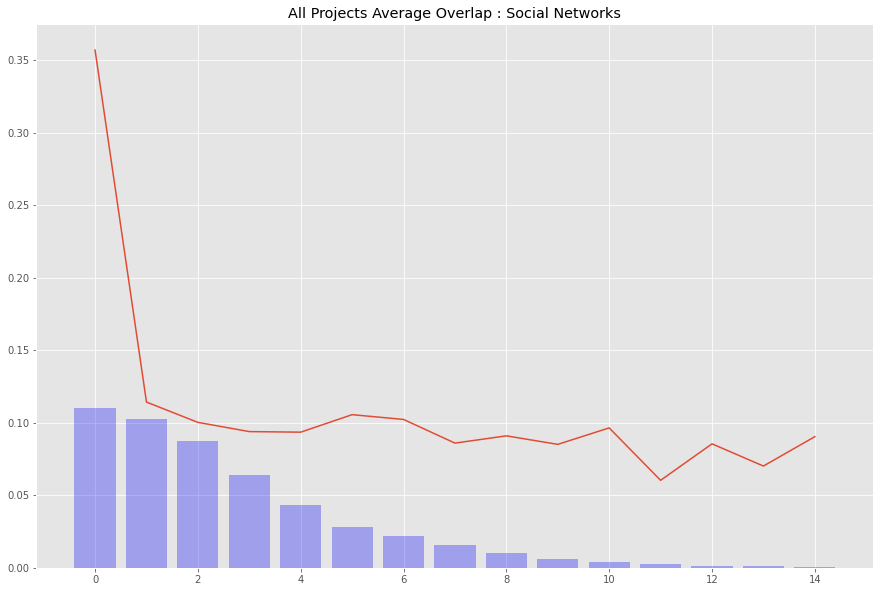

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.columns))]
count = [0 for i in range(len(df_tech_overlaps.columns))]

for col in df_social_overlaps.columns:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("All Projects Average Overlap : Social Networks")

plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
print(ave)
print(count)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f75513d3490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f75513c8c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f75513d3100>,
 'medians': [<matplotlib.lines.Line2D at 0x7f75513c8b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f75513c8a60>,
 'means': []}

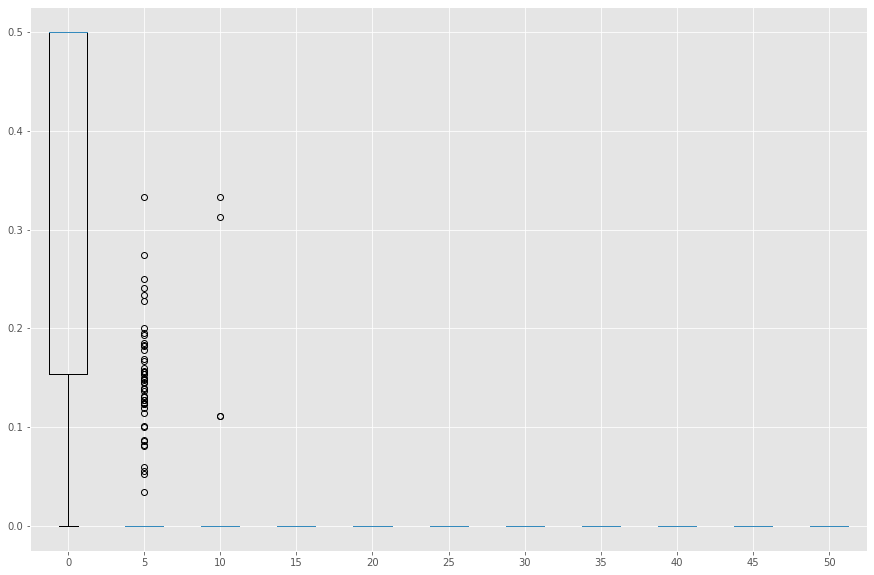

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_overlaps.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)

In [26]:
df_incubating = pd.read_csv('/mnt/data0/lkyin/incubating.csv')
df_graduated = pd.read_csv('/mnt/data0/lkyin/graduated.csv')
df_retired = pd.read_csv('/mnt/data0/lkyin/retired.csv')

In [27]:
c_path = '/mnt/data0/lkyin/monthly_data/commits/'
projects = os.listdir(c_path)
print("Total:", len(projects), "months")

proj_names = []
proj_ids= []
proj_status = []
for project in tqdm(projects):
    project_name, period = project.replace('.csv', '').split('__')
    proj_ids.append(project_name)
    if project_name in df_incubating["alias"].values :
        proj_status.append("incubating")
        proj_names.append(str(df_incubating.loc[df_incubating["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_graduated["alias"].values :
        proj_status.append('graduated')
        proj_names.append(str(df_graduated.loc[df_graduated["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_retired["alias"].values :
        proj_status.append('retired')
        proj_names.append(str(df_retired.loc[df_retired["alias"] == project_name]["project_name"].values[0]))
    else:
        proj_status.append('unknown')
        proj_names.append('unknown')

Total: 4327 months


100%|██████████| 4327/4327 [00:01<00:00, 3442.14it/s]


In [28]:
tech_proj_names = pd.Series(proj_names)
print(tech_proj_names.describe())

tech_proj_ids = pd.Series(proj_ids)

tech_proj_status = pd.Series(proj_status)
print(tech_proj_status.unique())

df_proj_tech = pd.DataFrame()
df_proj_tech['project_name'] = tech_proj_names
df_proj_tech['project_aliase'] = tech_proj_ids
df_proj_tech['project_status'] = tech_proj_status

df_proj_tech = df_proj_tech.drop_duplicates()
df_proj_tech.describe()

count        4327
unique        263
top       JSPWiki
freq           63
dtype: object
['retired' 'graduated']


,project_name,project_aliase,project_status
count,263,263,263
unique,263,263,2
top,Taverna,taverna,graduated
freq,1,1,204


In [33]:
all_graduated = df_proj_tech.where(df_proj_tech['project_status']=='graduated')["project_name"].dropna().unique().tolist()
for col in all_graduated:
    if col not in df_tech_overlaps:
        all_graduated = all_graduated.remove(col)
    elif col not in df_social_overlaps:
        all_graduated = all_graduated.remove(col)
len(all_graduated)
#print(all_graduated)

AttributeError: 'NoneType' object has no attribute 'remove'

UIMA
Qpid
Chukwa
EasyAnt
Drill
Calcite
Beehive
Fineract
ECharts
Shiro
Twill
Tephra
ESME
Ranger
TVM
TinkerPop
Daffodil
BatchEE
Impala
Falcon
APISIX
Thrift
Whirr
DirectMemory
Kafka
Allura
IoTDB
Rya
Tuscany
ActiveMQ
JSPWiki
Knox
DistributedLog
HCatalog
Mynewt
Etch
Gobblin
Tajo
Trinidad
Amber
CXF
Airavata
DeviceMap
Syncope
Cordova
Empire-db
Shindig
Mnemonic
Crunch
Unomi
Wink
HAWQ
Isis
Clerezza
VCL
Buildr
AsterixDB
NetBeans
Stratos
Iceberg
Mesos
Cassandra
SIS
REEF
Tez
Traffic Control
stdcxx
Superset
Abdera
Celix
Geode
Pinot
Joshua
OODT
Omid
Ambari
Guacamole
River
ACE
Usergrid
MyFaces
Griffin
Zeppelin
Helix
PDFBox
Ivy
ManifoldCF
Phoenix
Solr
DataFu
Sentry
Nuvem
OpenOffice.org
Click
VXQuery
Pulsar
SINGA
Dubbo
Wookie
Sanselan
Hama
SkyWalking
Stanbol
Bigtop
Ignite
Ode
Open Climate Workbench
Gora
Pig
Fluo
Atlas
OpenWhisk
Cayenne
FtpServer
Libcloud
CouchDB
FreeMarker
Trafodion
Kudu
Roller
Aurora
Ratis
Sling
Streams
ShardingSphere
Kylin
Metron
Chemistry
Sqoop
Openmeetings
Lucy
Eagle
Derby
ServiceC

KeyError: 'RocketMQ'

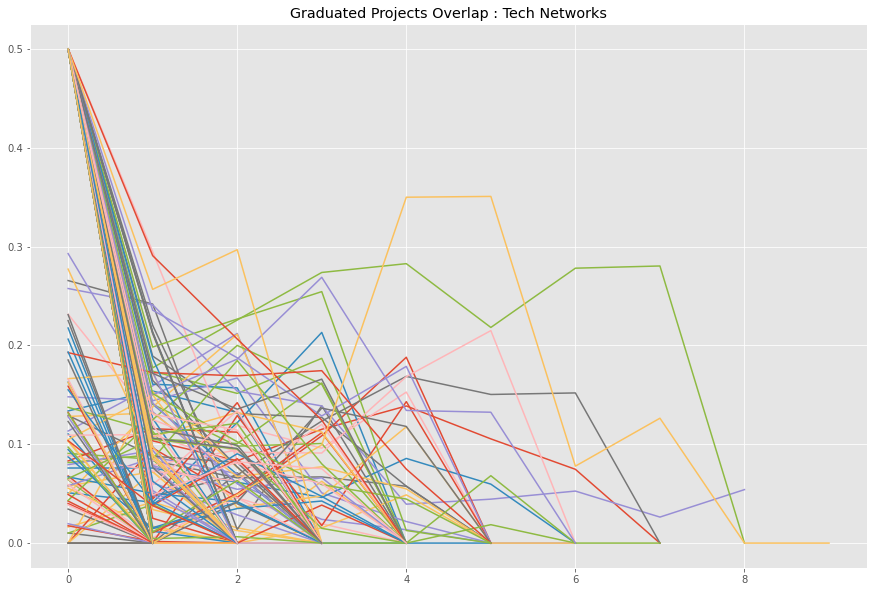

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in all_graduated:
    print(col)
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("Graduated Projects Overlap : Tech Networks")
    

<BarContainer object of 55 artists>

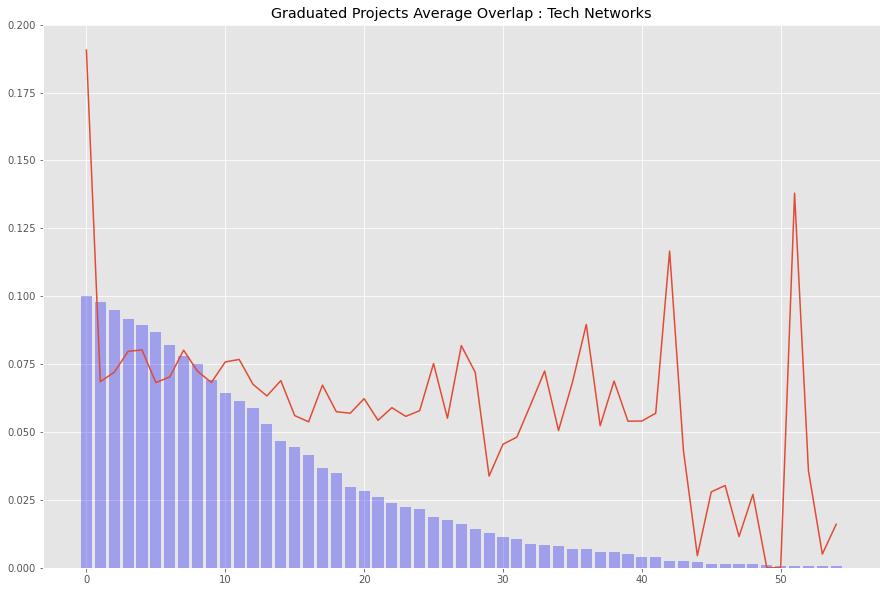

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(all_graduated))]
count = [0 for i in range(len(all_graduated))]

for col in all_graduated:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("Graduated Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
len(df_tech_overlaps.loc[0].values)
plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_overlaps.loc[0].values], label=[0])

Text(0.5, 1.0, 'Graduated Projects Average Overlap : Tech Networks')

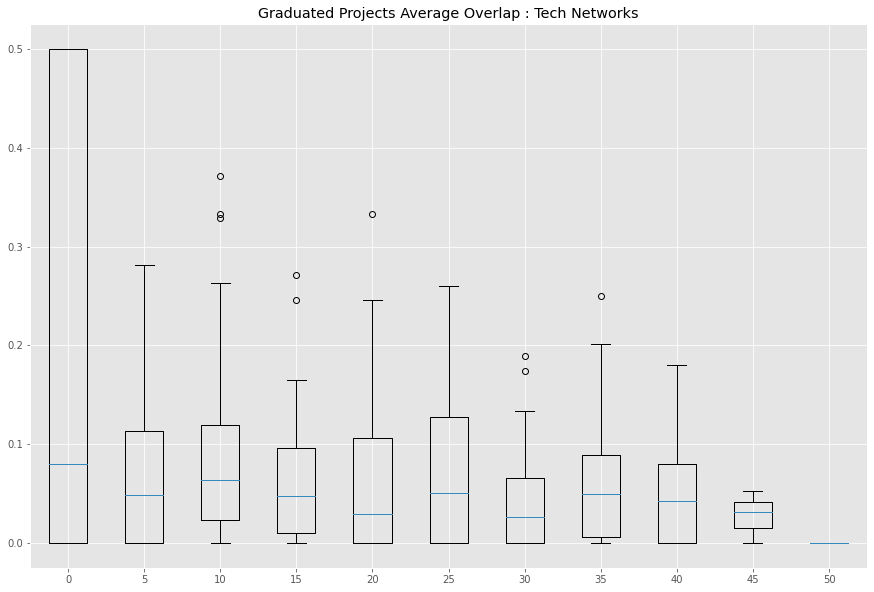

In [ ]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Graduated Projects Average Overlap : Tech Networks")

[0.31301533898685413, 0.12004021743303013, 0.14981823874971692, 0.14813634600277598, 0.14176013121524034, 0.13661444068621845, 0.1280350978623265, 0.1257039407915509, 0.11458455948736745, 0.12072597568943746, 0.12140468392317624, 0.12466380676490874, 0.11792642607726571, 0.11525611398155627, 0.1156119905538117, 0.11370502584019462, 0.1004515960558439, 0.09741388478308116, 0.09792462609092999, 0.0969326731362325, 0.10363230965530086, 0.10266466443633976, 0.11090707213499808, 0.12920505657943065, 0.11674314589528434, 0.10604941787531365, 0.10461856131897687, 0.09616737693736277, 0.08184654691542352, 0.08839501922128165, 0.0744845792141455, 0.07563350800951424, 0.07611836983878904, 0.08928864204550135, 0.07600445696086214, 0.09297236733438427, 0.1017812713318331, 0.07472226995029754, 0.06875824403048729, 0.08300445542421961, 0.05914333659994353, 0.05574363320723902, 0.06407386113021099, 0.05785222760405337, 0.06758316963148894, 0.08904070466570464, 0.09088513594442447, 0.07883597883597883

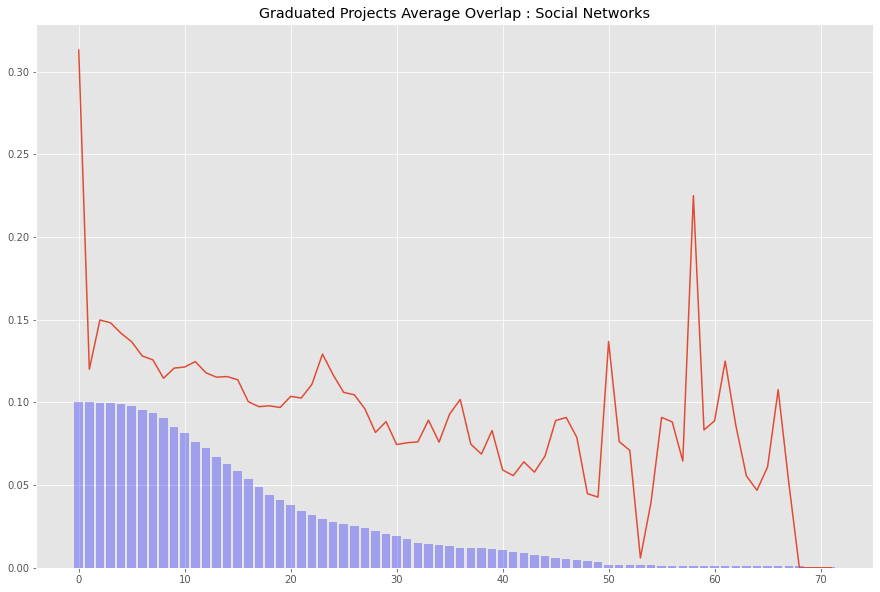

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(all_graduated))]
count = [0 for i in range(len(all_graduated))]

for col in all_graduated:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Graduated Projects Average Overlap : Social Networks")

plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
print(ave)
print(count)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95edf3a2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95edf3aa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95edf29e80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f95edf45160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f95edf454f0>,
 'means': []}

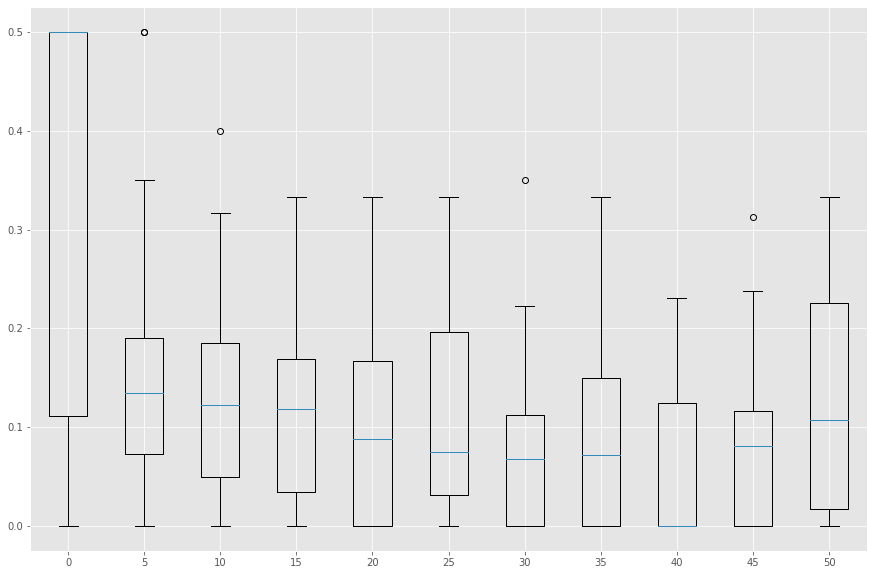

In [ ]:
df_social_overlaps_graduated = df_social_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)

In [ ]:
all_retired = df_proj_tech.where(df_proj_tech['project_status']=='retired')["project_name"].dropna().unique().tolist()

for col in all_retired:
    if col not in df_tech_overlaps:
        all_retired.remove(col)
    elif col not in df_social_overlaps:
        all_retired.remove(col)
#len(all_graduated)
#print(all_graduated)
len(all_retired)
#print(all_graduated)

58

UIMA
Qpid
Chukwa
EasyAnt
Drill
Calcite
Beehive
Fineract
ECharts
Shiro
Twill
Tephra
ESME
Ranger
TVM
TinkerPop
Daffodil
BatchEE
Impala
Falcon
APISIX
Thrift
Tika
Whirr
DirectMemory
Kafka
Allura
IoTDB
Rya
Tuscany
ActiveMQ
JSPWiki
Knox
DistributedLog
HCatalog
Mynewt
Airflow
Etch
Gobblin
Tajo
Trinidad
Amber
CXF
Airavata
DeviceMap
Syncope
Cordova
Empire-db
Shindig
Mnemonic
Crunch
Unomi
Wink
HAWQ
Isis
Clerezza
VCL
Buildr
AsterixDB
NetBeans
Stratos
Iceberg
Mesos
Cassandra
SIS
REEF
Tez
Traffic Control
stdcxx
Superset
Abdera
Celix
Geode
Pinot
Joshua
OODT
Omid
Ambari
Guacamole
River
ACE
Usergrid
MyFaces
Griffin
Zeppelin
Helix
PDFBox
Groovy
Ivy
ManifoldCF
Phoenix
Solr
DataFu
Sentry
Nuvem
OpenOffice.org
Click
VXQuery
Pulsar
SINGA
Dubbo
Wookie
Sanselan
Hama
SkyWalking
Stanbol
Bigtop
Ignite
Ode
Open Climate Workbench
Gora
Pig
Fluo
Atlas
OpenWhisk
Cayenne
FtpServer
Libcloud
CouchDB
FreeMarker
Trafodion
Kudu
Roller
Aurora
Ratis
Accumulo
Sling
Streams
ShardingSphere
Kylin
Metron
Chemistry
Sqoop
Openmeeti

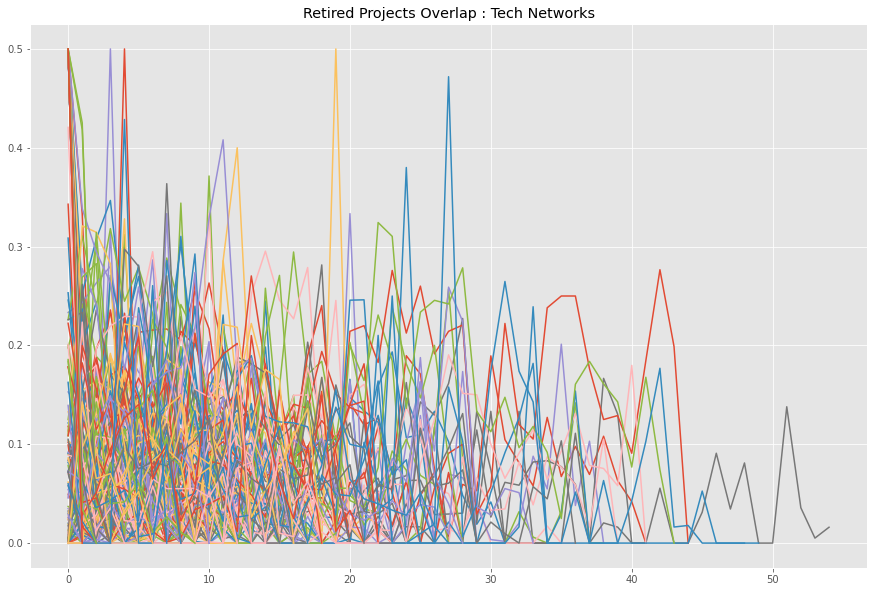

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in all_graduated:
    print(col)
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("Retired Projects Overlap : Tech Networks")
    

<BarContainer object of 46 artists>

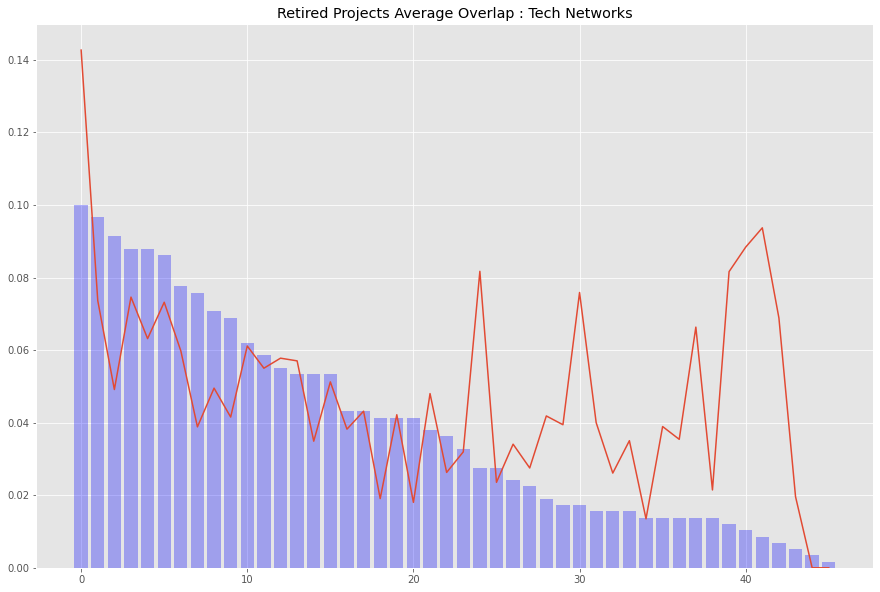

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(all_retired))]
count = [0 for i in range(len(all_retired))]

for col in all_retired:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("Retired Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
len(df_tech_overlaps.loc[0].values)
plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_overlaps.loc[0].values], label=[0])

Text(0.5, 1.0, 'Retired Projects Average Overlap : Tech Networks')

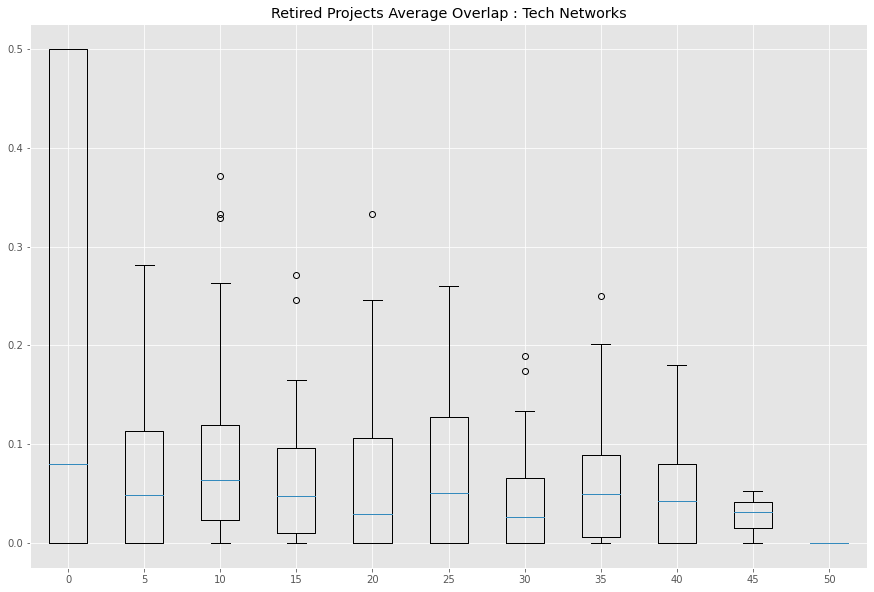

In [ ]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Retired Projects Average Overlap : Tech Networks")

[0.28269840960450027, 0.1494036435341392, 0.14173458457687954, 0.13662490464562516, 0.1342879522362036, 0.12568982629655304, 0.13240129759772618, 0.10268692884041551, 0.12008961003411531, 0.1111740798098669, 0.10370637560099621, 0.09368693815774526, 0.0854515176554962, 0.087902701856393, 0.09308983345664891, 0.08190479967355403, 0.09770105920430079, 0.08458818551857364, 0.08021571593902921, 0.0848756121221522, 0.08776447299068205, 0.07373789524375243, 0.10613322286667247, 0.10803234664397077, 0.09668213442247878, 0.08133816471824885, 0.09459757987718251, 0.0700234786222365, 0.05989246816124165, 0.07667317288622706, 0.09857336984471708, 0.08749807979091916, 0.05838495565179002, 0.06983893871511544, 0.04837743955391012, 0.04647808153905713, 0.048286001147446925, 0.031684641307745676, 0.0414891395154553, 0.0681870196591222, 0.07617694805194805, 0.036465379750316225, 0.054960529666412, 0.06498746867167919, 0.051653572808361935, 0.05897435897435897, 0.0636094674556213, 0.035897435897435895,

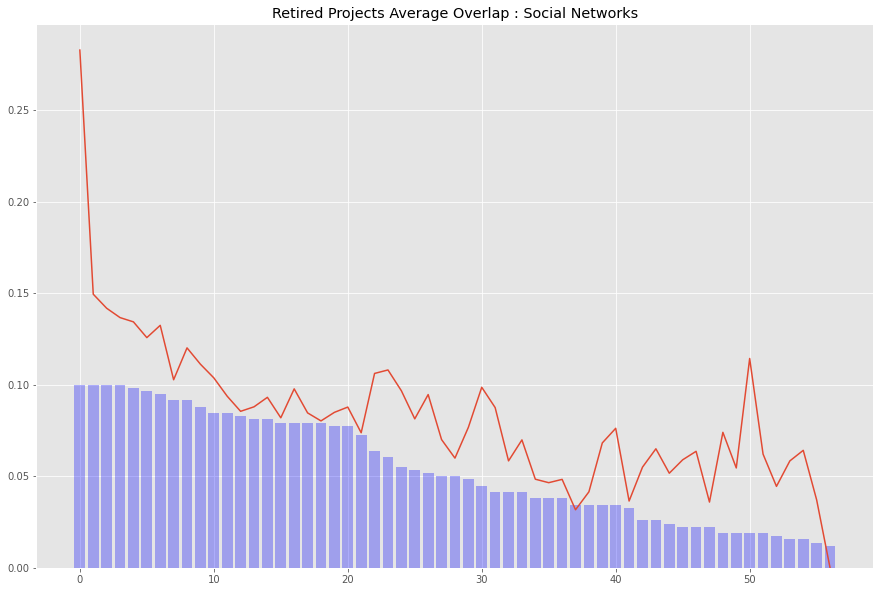

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(all_retired))]
count = [0 for i in range(len(all_retired))]

for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0:
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break

    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Retired Projects Average Overlap : Social Networks")

plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
print(ave)
print(count)

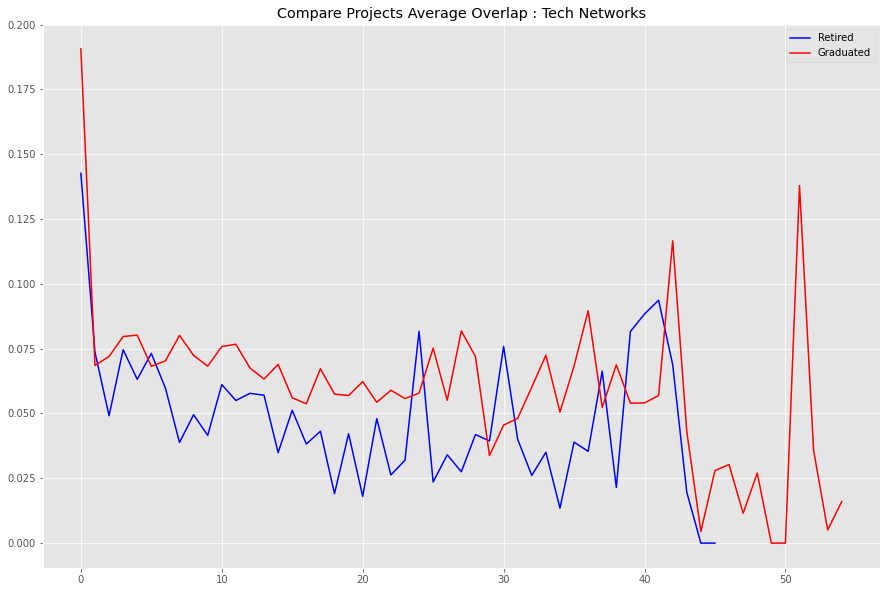

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(all_retired))]
count = [0 for i in range(len(all_retired))]

for col in all_retired:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(all_graduated))]
count = [0 for i in range(len(all_graduated))]

for col in all_graduated:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

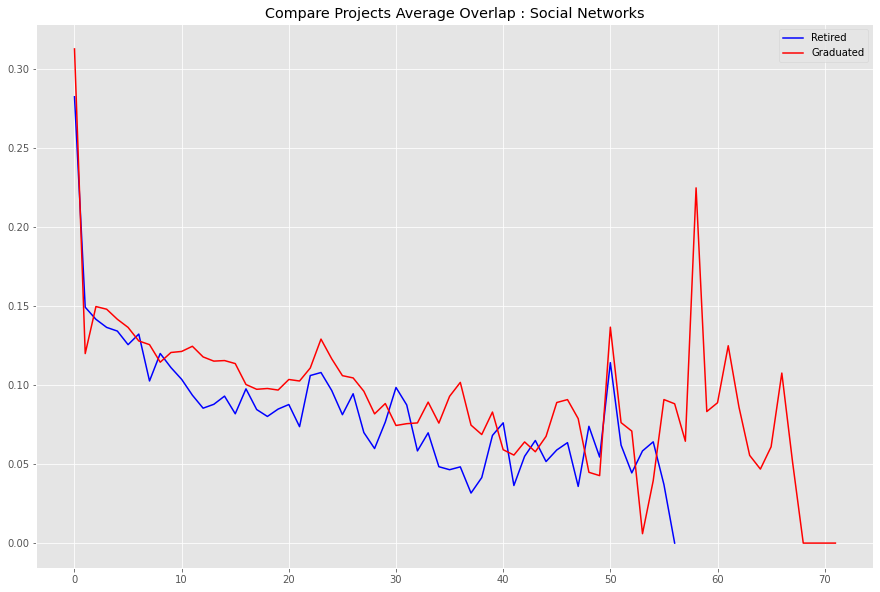

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(all_retired))]
count = [0 for i in range(len(all_retired))]

for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(all_graduated))]
count = [0 for i in range(len(all_graduated))]

for col in all_graduated:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Social Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(count)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

In [ ]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : Tech Networks")

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


<Figure size 1080x720 with 0 Axes>

In [ ]:
df.head(10)

,Time,Graduated,Retired
0,0,"[0.0, 0.0716145833333333, 0.5, 0.5, 0.0, 0.09,...","[0.1304347826086956, 0.081081081081081, 0.5, 0..."
1,5,"[0.0466237942122186, 0.1348214285714285, 0.029...","[0.0, 0.0, 0.125, 0.0, 0.0, 0.1273885350318471..."
2,10,"[0.1253481894150417, 0.1457840819542947, 0.2, ...","[0.0, 0.0, 0.03125, 0.0, 0.0909090909090909, 0..."
3,15,"[0.0281995661605206, 0.1063464837049742, 0.013...","[0.1379310344827586, 0.0344827586206896, 0.049..."
4,20,"[0.1414141414141414, 0.1474435196195005, 0.333...","[0.0294117647058823, 0.0, 0.0, 0.0, 0.14925373..."
5,25,"[0.1710526315789473, 0.1108132260947274, 0.047...","[0.0, 0.0, 0.0, 0.1428571428571428, 0.01744186..."
6,30,"[0.1894273127753304, 0.0, 0.0416054821341164, ...","[0.0, 0.0, 0.0, 0.1688311688311688, 0.0, 0.055..."
7,35,"[0.0672897196261682, 0.2012578616352201, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.1290322580645161, 0.153..."
8,40,"[0.0419161676646706, 0.0, 0.0, 0.0909090909090...","[0.0, 0.0, 0.0, 0.2394366197183098, 0.13207547..."
9,45,"[0.03125, 0.0526315789473684, 0.0]",[0.0]


In [ ]:
df = df.explode("Graduated")
df = df.explode("Retired")

Text(0.5, 1.0, 'Compare Projects Average Overlap : Tech Networks')

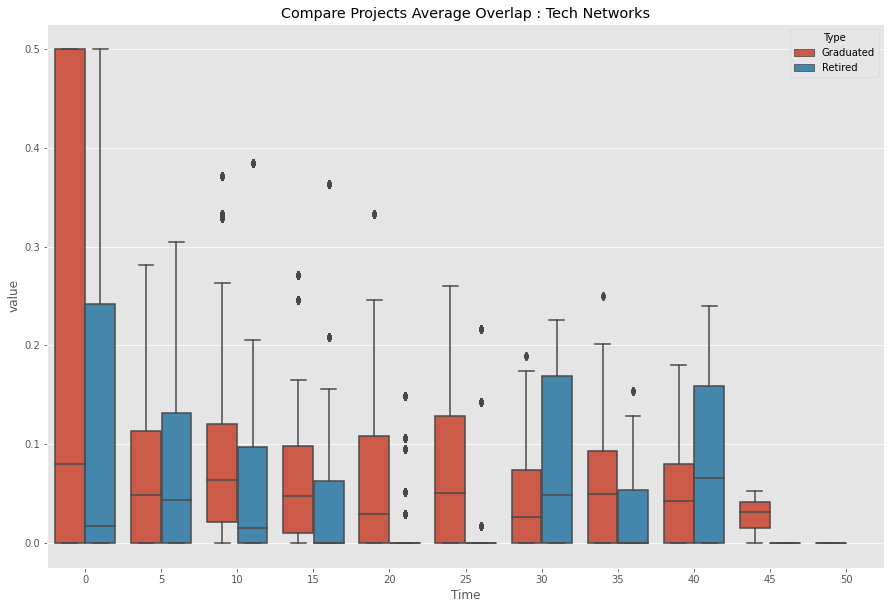

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : Tech Networks")

In [ ]:
df_social_overlaps_graduated = df_social_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_social_overlaps_retired = pd.DataFrame()
for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    df_social_overlaps_retired[col] = df_social_overlaps[col]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : social Networks")

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : Social Networks')

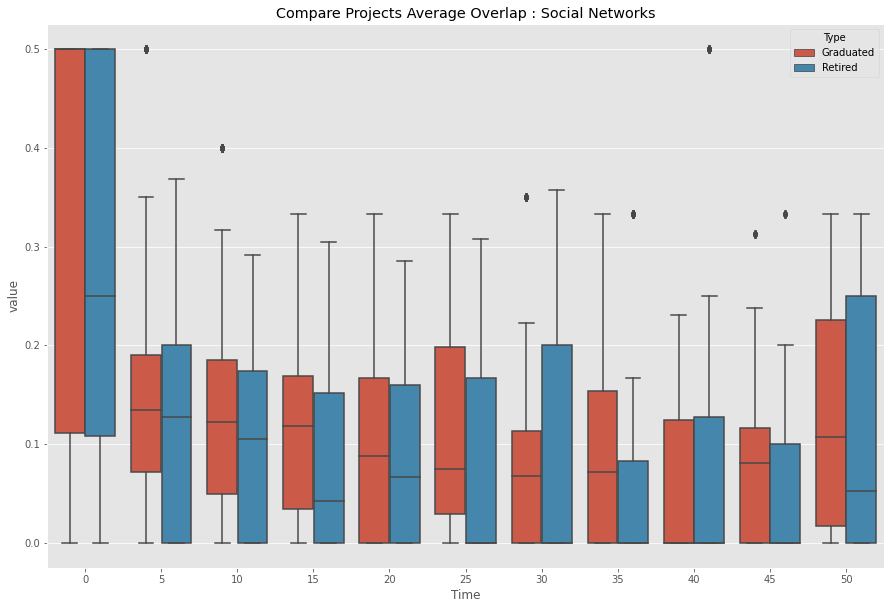

In [ ]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : Social Networks")